# Probability-based Learning

Probability-based learning approaches can make predictions using the conditional probabilities. Bayes’ Theorem provides a way that we can calculate the probability of a data instance belonging to a particular class, given our prior knowledge. Bayes’ Theorem is stated as:

P(class|data) = (P(data|class) * P(class)) / P(data)


Where P(class|data) is the probability of class given the provided data. 

The most popular probability-based learning algorithm is Naive Bayes. It is a straightforward model, and it can be used on a wide range of problems.


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


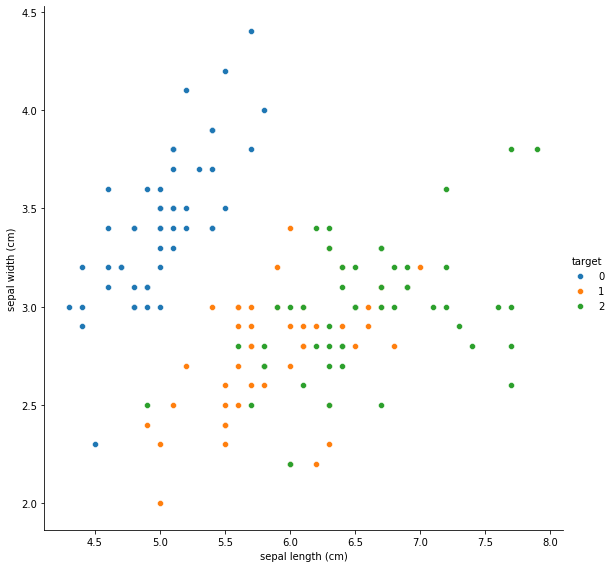

In [1]:
#import utility libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Before we start, first load a toy dataset we will use for building these classifiers
from sklearn.datasets import load_iris
data = load_iris()
desc_features = data.feature_names
print(desc_features)
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
# df.head()

#Show the scatter of sepal length vs sepal width/ add target hue
sns.FacetGrid(df, hue="target", height=8).map(sns.scatterplot, "sepal length (cm)", "sepal width (cm)").add_legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff43d98eed0>,
      dtype=object)

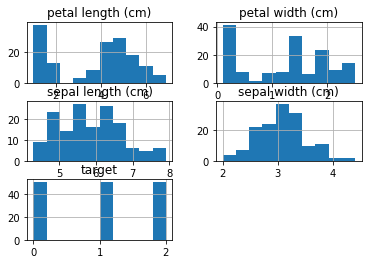

In [2]:
# see how the data is distributed
df.hist()

In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


#Setup X and y data
X = df[["sepal length (cm)", "sepal width (cm)"]]
y = df.target

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=0)

#Fit model
_nbc = GaussianNB(priors = None)
_nbc.fit(X_train,y_train)

y_pred = _nbc.predict(X_test)
print("NB Accuracy: {0:.2f}".format( accuracy_score(y_test,y_pred) ))

NB Accuracy: 0.78


Text(0.5, 1, 'Naive Bayes decision boundaries')

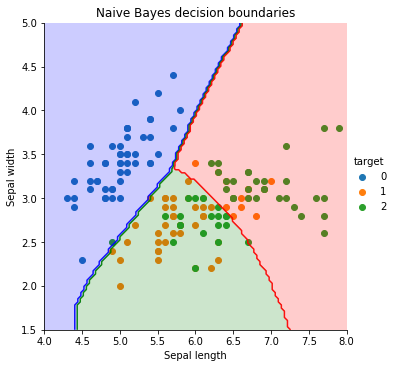

In [5]:
import matplotlib.colors as colors

# variables X and Y for 2d grid representation
N = 100
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)

g= sns.FacetGrid(df, hue="target", height=5).map(plt.scatter,"sepal length (cm)", "sepal width (cm)").add_legend()

#Determine predicted class for each value on the 2d grid
_grid_result_list = [_nbc.predict( [[xx,yy]])[0] for xx, yy in zip(np.ravel(X), np.ravel(Y)) ]
Z = np.array(_grid_result_list).reshape(X.shape)


#Plot the contours and boundaries
g.ax.contourf( X, Y, Z, 2, alpha = .2, colors = ('blue','green','red'))
g.ax.contour( X, Y, Z, 2, alpha = .9, colors = ('blue','green','red'))

# Addd axis and title
g.ax.set_xlabel('Sepal length')
g.ax.set_ylabel('Sepal width')
g.ax.set_title('Naive Bayes decision boundaries')

# Error-based Learning
Linear regression model is a well-known supervised learning algorithm that predicts continuous values using an error function. Linear regression, as its name suggests, expects a linear relationship being present between descriptive features and target variable. In other words, it finds a linear relationship (line/plane etc.) that best describes the relationship among two or more variables.

Logistic regression is another supervised learning algorithm which practically builds binary classification models. In the case of logistic regression, error function is set to a logistic function that maps the output to levels. For multinomial classification, one-vs-all approaches are utilized.

In [6]:
from sklearn.linear_model import  LogisticRegression

_logreg = LogisticRegression()
_logreg.fit(X_train, y_train)
y_pred = _logreg.predict(X_test)

print("Log Reg Accuracy: {0:.2f}".format( accuracy_score(y_test,y_pred) ))

Log Reg Accuracy: 0.76


In [7]:
_logreg.coef_, _logreg.intercept_

(array([[-2.44539334,  1.93950372],
        [ 0.53819781, -1.4297883 ],
        [ 1.90719553, -0.50971541]]),
 array([ 7.72834495,  1.71066189, -9.43900684]))

Text(0.5, 1, 'Logistic regression decision boundaries')

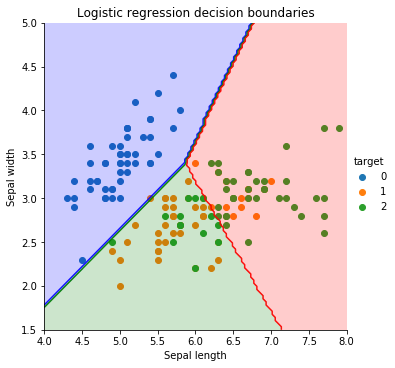

In [8]:
# 2D classifier will be over variables X and Y
N = 100
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)

g= sns.FacetGrid(df, hue="target", height=5).map(plt.scatter,"sepal length (cm)", "sepal width (cm)").add_legend()

#Computing the predicted class function for each value on the grid
_grid_result_list = [_logreg.predict( [[xx,yy]])[0] for xx, yy in zip(np.ravel(X), np.ravel(Y)) ]
Z = np.array(_grid_result_list).reshape(X.shape)


#Plot the filled and boundary contours
g.ax.contourf( X, Y, Z, 2, alpha = .2, colors = ('blue','green','red'))
g.ax.contour( X, Y, Z, 2, alpha = .9, colors = ('blue','green','red'))

# Addd axis and title
g.ax.set_xlabel('Sepal length')
g.ax.set_ylabel('Sepal width')
g.ax.set_title('Logistic regression decision boundaries')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression


_logreg = LogisticRegression()
_logreg.fit(X_train, y_train)
y_pred = _logreg.predict(X_test)

print("Log Reg Accuracy: {0:.2f}".format( accuracy_score(y_test,y_pred) ))

## Logistic Regression with Basis Functions

In [9]:
df['sl2'] = df["sepal length (cm)"] * df["sepal length (cm)"]
df['sw2'] = df["sepal width (cm)"] * df["sepal width (cm)"]

X2 = df[["sepal length (cm)", "sepal width (cm)", 'sl2', 'sw2']]
y2 = df.target

X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.33,random_state=0)

_logreg_bf = LogisticRegression(max_iter = 1000)
_logreg_bf.fit(X2_train, y2_train)
y2_pred = _logreg_bf.predict(X2_test)

print("Log Reg (basis functions) Accuracy: {0:.2f}".format( accuracy_score(y2_test,y2_pred) ))

Log Reg (basis functions) Accuracy: 0.80


Text(0.5, 1, 'Logistic regression (basis func) decision boundaries')

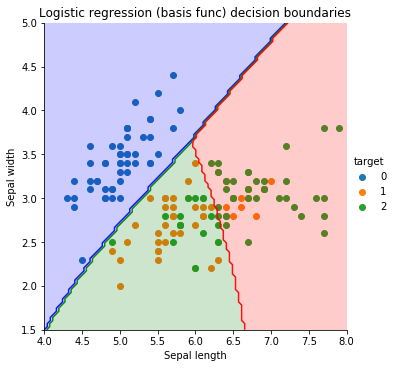

In [11]:
g= sns.FacetGrid(df, hue="target", height=5).map(plt.scatter,"sepal length (cm)", "sepal width (cm)").add_legend()

#Computing the predicted class function for each value on the grid
_grid_result_list = [_logreg_bf.predict( [[xx,yy, x2, y2]])[0] for xx, yy, x2, y2 in zip(np.ravel(X), np.ravel(Y), np.ravel(X*X), np.ravel(Y*Y)) ]
Z = np.array(_grid_result_list).reshape(X.shape)


#Plot the filled and boundary contours
g.ax.contourf( X, Y, Z, 2, alpha = .2, colors = ('blue','green','red'))
g.ax.contour( X, Y, Z, 2, alpha = .9, colors = ('blue','green','red'))

# Addd axis and title
g.ax.set_xlabel('Sepal length')
g.ax.set_ylabel('Sepal width')
g.ax.set_title('Logistic regression (basis func) decision boundaries')

## Using an SGD for logistic regression

In [70]:
from sklearn.linear_model import SGDClassifier
from sklearn import linear_model


X_train,X_test,y_train,y_test=train_test_split(df[["sepal length (cm)", "sepal width (cm)"]],df.target
                                               ,test_size=0.33,random_state=0)

_sgd = SGDClassifier(loss='log', max_iter=1000, eta0 = 0.1, learning_rate='optimal', tol=1e-4)
_sgd.fit(X_train, y_train)
y_pred = _sgd.predict(X_test)

print("Log Reg (SGD) Accuracy: {0:.2f}".format( accuracy_score(y_test,y_pred) ))

Log Reg (SGD) Accuracy: 0.74


Text(0.5, 1, 'Logistic regression with SGD decision boundaries')

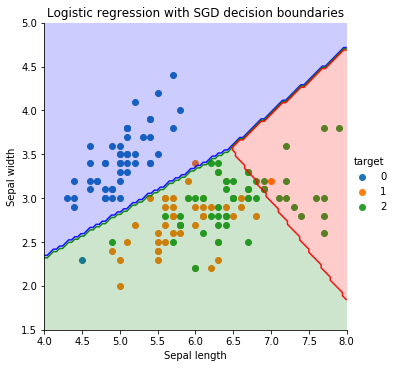

In [71]:
# 2D classifier will be over variables X and Y
N = 100
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)

g= sns.FacetGrid(df, hue="target", height=5).map(plt.scatter,"sepal length (cm)", "sepal width (cm)").add_legend()

#Computing the predicted class function for each value on the grid
_grid_result_list = [_sgd.predict( [[xx,yy]])[0] for xx, yy in zip(np.ravel(X), np.ravel(Y)) ]
Z = np.array(_grid_result_list).reshape(X.shape)


#Plot the filled and boundary contours
g.ax.contourf( X, Y, Z, 2, alpha = .2, colors = ('blue','green','red'))
g.ax.contour( X, Y, Z, 2, alpha = .9, colors = ('blue','green','red'))

# Addd axis and title
g.ax.set_xlabel('Sepal length')
g.ax.set_ylabel('Sepal width')
g.ax.set_title('Logistic regression with SGD decision boundaries')

## Linear Regression 

In [72]:
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


from sklearn.datasets import load_diabetes
dia_data = load_diabetes()
dia_desc_feat = dia_data.feature_names
dia_data.keys()

print(dia_desc_feat)
dia_df = pd.DataFrame(dia_data.data, columns=dia_desc_feat)
dia_df['target'] = dia_data.target
dia_df.head()

from sklearn import preprocessing
scaled_df = preprocessing.StandardScaler().fit_transform(dia_df)
sdf=pd.DataFrame(scaled_df, columns=dia_df.columns)
sdf['target']=dia_df['target']
sdf.head()



['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.800500,1.065488,1.297088,0.459840,-0.929746,-0.732065,-0.912451,-0.054499,0.418551,-0.370989,151.0
1,-0.039567,-0.938537,-1.082180,-0.553511,-0.177624,-0.402886,1.564414,-0.830301,-1.436551,-1.938479,75.0
2,1.793307,1.065488,0.934533,-0.119218,-0.958674,-0.718897,-0.680245,-0.054499,0.060207,-0.545154,141.0
3,-1.872441,-0.938537,-0.243771,-0.770658,0.256292,0.525397,-0.757647,0.721302,0.477072,-0.196823,206.0
4,0.113172,-0.938537,-0.764944,0.459840,0.082726,0.327890,0.171178,-0.054499,-0.672582,-0.980568,135.0


In [73]:
# Use only one feature
X_bmi = sdf[['bmi']]
y = sdf['target']

X_train, X_test, Y_train, Y_test = train_test_split(X_bmi, y, test_size=0.33, random_state=0)

In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Create a simple regression model
_lr = linear_model.LinearRegression()

# fit the model
_lr.fit(X_train, Y_train)

# predict on test data
y_pred = _lr.predict(X_test)

# evaluate
print("MAE: {:.2f}".format( mean_absolute_error(Y_test, y_pred) ) )

print("RMSE: {:.2f}".format( np.sqrt( mean_squared_error(Y_test, y_pred) ) ) )

MAE: 51.86
RMSE: 63.28


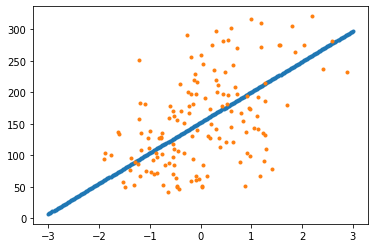

In [75]:
x_line = np.linspace(-3, 3, 300)
y_line = _lr.predict(x_line.reshape(-1, 1))
plt.plot(x_line, y_line, '.')

# plot prediction and actual data
plt.plot(X_test, Y_test, '.')

MAE: 53.36
RMSE: 68.53
[35.46943045  6.40749792]


/home/baydin2/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


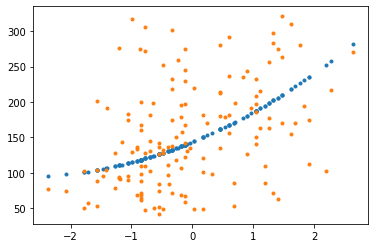

In [76]:
# using basis functions (bp and bp^2)
X_bmi = sdf[['bp']]
X_bmi['bp2'] = sdf['bp']*sdf['bp']
y = sdf['target']

X_train, X_test, Y_train, Y_test = train_test_split(X_bmi, y, test_size=0.33, random_state=0)

# Create a simple regression model
_lr = linear_model.LinearRegression()

# fit the model with basis function emulation
_lr.fit(X_train, Y_train)

# predict on test data
y_pred = _lr.predict(X_test)

# evaluate
print("MAE: {:.2f}".format( mean_absolute_error(Y_test, y_pred) ) )

print("RMSE: {:.2f}".format( np.sqrt( mean_squared_error(Y_test, y_pred) ) ) )

print(_lr.coef_)

x_line = np.linspace(-3, 3, 100)
x_line2 = np.multiply(x_line,x_line)
X_l = np.column_stack((x_line, x_line2))

y_line = _lr.predict(X_l)
plt.plot(X_test['bp'], y_pred, '.')

# # plot prediction and actual data
plt.plot(X_test['bp'],Y_test,  '.')

### Multivariate linear regression

In [77]:
# Use three features
X_ = sdf[[ 'age', 'bp', 'bmi']]
y = sdf['target']

X_train, X_test, Y_train, Y_test = train_test_split(X_, y, test_size=0.33, random_state=0)


# Create a multivariate regression model
_lr = linear_model.LinearRegression()

# fit the model
_lr.fit(X_train, Y_train)

# predict on test data
y_pred = _lr.predict(X_test)

# evaluate
print("MAE: {:.2f}".format( mean_absolute_error(Y_test, y_pred) ) )

print("RMSE: {:.2f}".format( np.sqrt( mean_squared_error(Y_test, y_pred) ) ) )

MAE: 49.26
RMSE: 60.49


In [78]:
# check the coefficients
_lr.coef_, _lr.intercept_

(array([ 0.28446402, 19.27933716, 40.03517512]), 151.39956744551415)

In [79]:
# see how regression output is calculated using a dot product + intercept
print(X_test.iloc[0].values.dot(_lr.coef_) + _lr.intercept_)

print(y_pred[0])

268.1373705037365
268.1373705037365
